# IMDB Reviews Lemmatization
This notebook performs lemmatization on the IMDB movie reviews dataset to preprocess the text data, analyze vocabulary size, and visualize the most frequent words.

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# Load the IMDB dataset
dataset = pd.read_csv('IMDB Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Encode sentiment labels (positive=1, negative=0)
label_encoder = LabelEncoder()
dataset['sentiment'] = label_encoder.fit_transform(dataset['sentiment'])
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [5]:
# Download required NLTK resources
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Initialize stopwords set and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [8]:
# Lemmatize the first 50,000 reviews
lemmatized_corpus = []
for review in dataset['review'][:50000]:
    # Remove HTML tags and non-alphabetic characters
    review = re.sub(r'<.*?>|[^a-zA-Z]', ' ', review)
    # Convert to lowercase and split into words
    words = review.lower().split()
    # Lemmatize and remove stopwords
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join back to string
    lemmatized_corpus.append(' '.join(lemmatized_words))

In [9]:
# Calculate vocabulary size after lemmatization
lemmatized_vocab_size = len(set(' '.join(lemmatized_corpus).split()))
print(f"Vocabulary size after lemmatization: {lemmatized_vocab_size}")

Vocabulary size after lemmatization: 89817


In [10]:
# Display top 10 most frequent words
lemmatized_word_freq = Counter(' '.join(lemmatized_corpus).split())
for word, freq in lemmatized_word_freq.most_common(10):
    print(f"{word}: {freq}")

movie: 103281
film: 93463
one: 55450
like: 41132
time: 31470
good: 29868
character: 28361
story: 25276
even: 24873
get: 24658


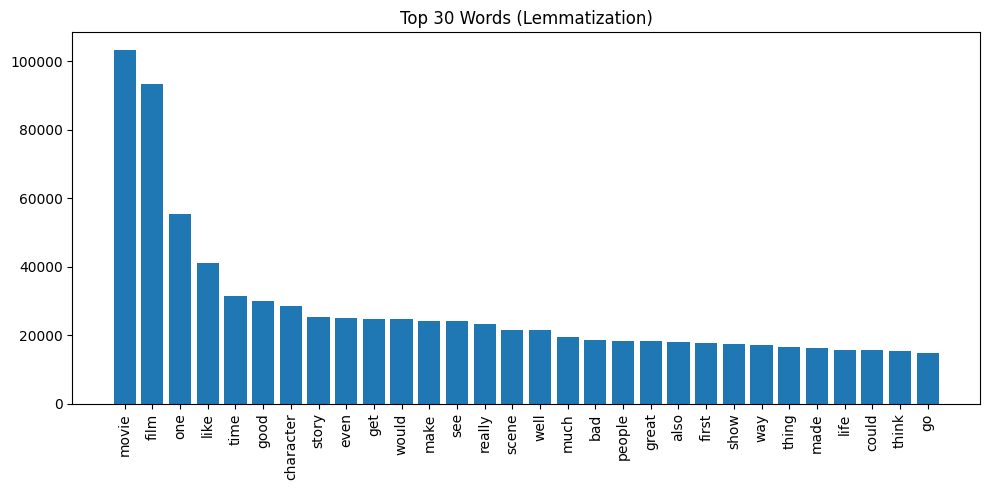

In [11]:
# Plot top 30 words frequency
top_30_lemmatized = lemmatized_word_freq.most_common(30)
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_30_lemmatized))
plt.title("Top 30 Words (Lemmatization)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

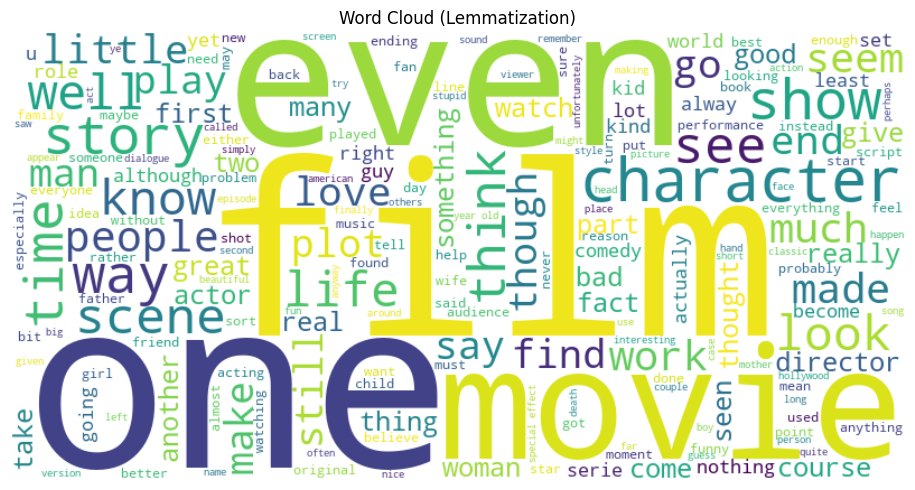

In [12]:
# Generate and display word cloud
lemmatized_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(lemmatized_corpus))
plt.figure(figsize=(10, 5))
plt.imshow(lemmatized_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud (Lemmatization)")
plt.tight_layout()
plt.show()

## Analysis
- The vocabulary size after lemmatization is calculated to understand the diversity of the processed text.
- Lemmatization helps retain meaningful word forms, leading to a richer vocabulary compared to stemming.
- The word cloud and bar plot visualize the most frequent and important words in the dataset.